In [1]:
%load_ext lab_black

# Performance

Comparing the performance between `prefetch` + `fasterq-dump` with `parallel-fastq-dump`.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
raw = pd.read_table("execution_trace.txt", sep="\t")
raw

,task_id,hash,native_id,name,status,exit,submit,duration,realtime,%cpu,peak_rss,peak_vmem,rchar,wchar
0,35,da/20c670,1707094,PARALLEL_FASTQ:PARALLEL_FASTQ_DUMP (ERR2815301),COMPLETED,0,2021-07-27 22:01:02.562,11.5s,11.4s,18.7%,193.4 MB,984.9 MB,125.4 MB,251.3 MB
1,55,ab/19159b,1709345,PARALLEL_FASTQ:PARALLEL_FASTQ_DUMP (ERR2815309),COMPLETED,0,2021-07-27 22:01:14.027,10.3s,10.2s,22.8%,229 MB,984.9 MB,142.4 MB,290.7 MB
2,10,ff/d8e467,1711448,PARALLEL_FASTQ:PARALLEL_FASTQ_DUMP (ERR1017172),COMPLETED,0,2021-07-27 22:01:24.344,37.8s,37.7s,37.0%,428.1 MB,984.9 MB,1 GB,2.2 GB
3,56,ee/441b50,1715800,PARALLEL_FASTQ:PARALLEL_FASTQ_DUMP (ERR2815328),COMPLETED,0,2021-07-27 22:02:02.141,10.8s,10.7s,28.9%,270.8 MB,984.9 MB,193.4 MB,407.3 MB
4,19,af/4cdbcd,1718263,SRA_FASTQ:SRA_PREFETCH (ERR2815299),COMPLETED,0,2021-07-27 22:02:12.946,10s,9.9s,6.0%,11.2 MB,19.5 MB,47.2 MB,44.9 MB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,17/28c2cc,2268961,SRA_FASTQ:SRA_DUMP (DRR000028),COMPLETED,0,2021-07-28 01:00:13.951,29s,28.9s,143.1%,217.3 MB,1.1 GB,5.6 GB,10.1 GB
233,234,7a/ca7ba3,2270129,SRA_FASTQ:SRA_DUMP (DRR000024),COMPLETED,0,2021-07-28 01:00:42.919,32.9s,32.8s,127.9%,220.8 MB,1.1 GB,5.8 GB,10.4 GB
234,235,75/fdb624,2271386,SRA_FASTQ:SRA_DUMP (DRR000025),COMPLETED,0,2021-07-28 01:01:15.790,32.6s,32.5s,143.1%,206.4 MB,1.1 GB,6.2 GB,11.2 GB
235,236,b7/af29ce,2272632,SRA_FASTQ:SRA_DUMP (DRR000030),COMPLETED,0,2021-07-28 01:01:48.425,31.5s,31.4s,125.9%,215.4 MB,1.1 GB,5.7 GB,10.3 GB


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   task_id    237 non-null    int64 
 1   hash       237 non-null    object
 2   native_id  237 non-null    int64 
 3   name       237 non-null    object
 4   status     237 non-null    object
 5   exit       237 non-null    int64 
 6   submit     237 non-null    object
 7   duration   237 non-null    object
 8   realtime   237 non-null    object
 9   %cpu       237 non-null    object
 10  peak_rss   237 non-null    object
 11  peak_vmem  237 non-null    object
 12  rchar      237 non-null    object
 13  wchar      237 non-null    object
dtypes: int64(3), object(11)
memory usage: 26.0+ KB


In [5]:
df = pd.DataFrame(
    {
        "workflow": raw["name"].str.split(":", 1, expand=True)[0],
        "accession": raw["name"].str.extract(r"\((\w+)\)", expand=False),
        "duration": pd.to_timedelta(raw["duration"]).dt.total_seconds(),
    }
).sort_index()

In [6]:
duration_sub = (
    df.loc[:, ["workflow", "accession", "duration"]]
    .groupby(["workflow", "accession"])["duration"]
    .sum()
)

## Result

In [7]:
plt.rcParams["figure.figsize"] = 16, 9

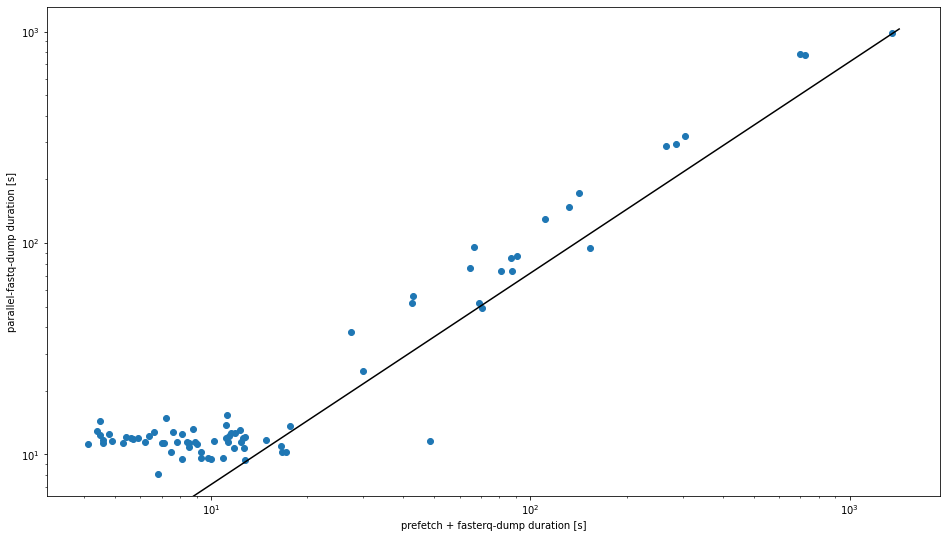

In [8]:
plt.scatter(duration_sub.loc["SRA_FASTQ"], duration_sub.loc["PARALLEL_FASTQ"])
plt.plot(plt.xlim(), plt.ylim(), color="black")
plt.loglog()
plt.xlabel("prefetch + fasterq-dump duration [s]")
plt.ylabel("parallel-fastq-dump duration [s]")
plt.savefig("duration.png", dpi=300)
plt.show()